In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

In [2]:
# import csv data file
mushrooms = pd.read_csv('data/mushrooms.csv')

In [3]:
# csv file info
mushrooms.info()

# csv file data preview
mushrooms.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
# check for null values
print(mushrooms.isnull().sum())

# check out stats
mushrooms.describe()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


e    4208
p    3916
Name: class, dtype: int64


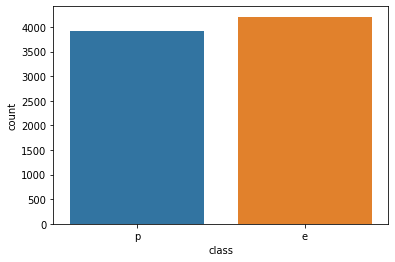

In [5]:
# remove veil-type because of single unique value
mushrooms = mushrooms.drop('veil-type', axis = 1)

# check balance of prediction attribute
sns.countplot(mushrooms['class'])
print(mushrooms['class'].value_counts())

In [6]:
# le = LabelEncoder()
# # for column in mushrooms.columns:
# #     mushrooms[column] = le.fit_transform(mushrooms[column])

# mushrooms.describe()

In [7]:
le = LabelEncoder()
mushroomsEncoded = mushrooms.apply(le.fit_transform)
mushroomsEncoded.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


In [8]:
# ohc = OneHotEncoder()
# # ohc.fit(mushroomsEncoded)
# # mushroomsEncoded = ohc.fit_transform(mushroomsEncoded).toarray()
# ohc.fit(mushrooms)
# mushroomsEncoded = ohc.fit_transform(mushrooms).toarray()

In [9]:
# le = LabelEncoder()
# mushrooms['class'] = le.fit_transform(mushrooms['class'])

# mushroomsEncoded = pd.get_dummies(mushrooms, prefix_sep='_', drop_first=True)
# mushroomsEncoded.head()

In [10]:
# split dataset into variables and classification
X = mushroomsEncoded.drop('class', axis = 1)
y = mushroomsEncoded['class']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 3)

In [12]:
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [13]:
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1406
           1       1.00      1.00      1.00      1275

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681

[[1406    0]
 [   0 1275]]


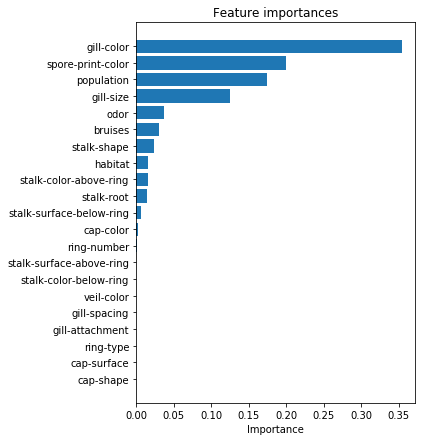

In [14]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

features_list = X.columns.values
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(5,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importances')
plt.draw()
plt.show()

In [15]:
Z = mushroomsEncoded.drop('class', axis = 1)
target = mushroomsEncoded['class']

rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(20), scoring='accuracy')
rfecv.fit(Z, target)

RFECV(cv=StratifiedKFold(n_splits=20, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                       criterion='gini', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators='warn', n_jobs=None,
                                       oob_score=False, random_state=101,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [16]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 9


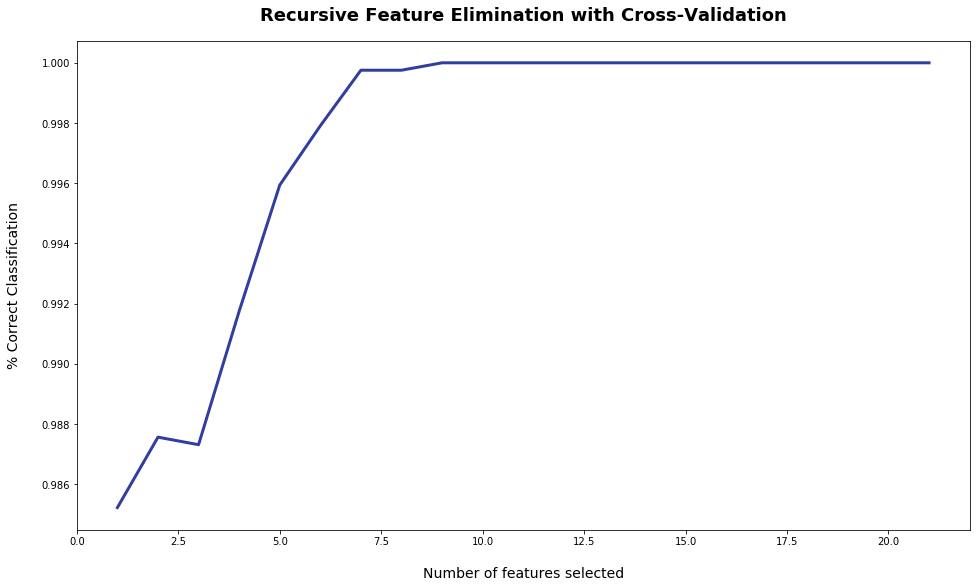

In [17]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [18]:
print(np.where(rfecv.support_ == True)[0])

[ 3  4  6  7 10 11 17 18 19]


In [19]:
mushroomsEncoded2 = mushroomsEncoded[['class', 'gill-color', 'spore-print-color', 'population', 'gill-size']]
mushroomsEncoded2.head()

,class,gill-color,spore-print-color,population,gill-size
0,1,4,2,3,1
1,0,4,3,2,0
2,0,5,3,2,0
3,1,5,2,3,1
4,0,4,3,0,0


In [20]:
X = mushroomsEncoded2.drop('class', axis = 1)
y = mushroomsEncoded2['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 3)

In [21]:
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [22]:
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1406
           1       0.98      0.98      0.98      1275

    accuracy                           0.98      2681
   macro avg       0.98      0.98      0.98      2681
weighted avg       0.98      0.98      0.98      2681

[[1378   28]
 [  23 1252]]


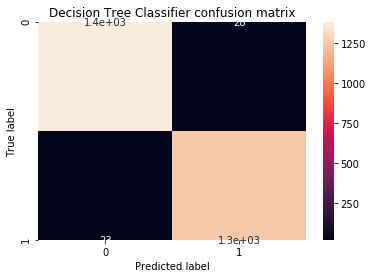

In [23]:
cfm=confusion_matrix(y_test, pred_rfc)

sns.heatmap(cfm, annot = True)
plt.title('Decision Tree Classifier confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [24]:
# Xnew = [[4,3,2,0]]
Xnew = [[4,2,3,1]]
ynew = rfc.predict(Xnew)
ynew

array([1])

In [25]:
import pickle

with open('mushroom_classifier.pkl', 'wb') as f:
    pickle.dump(rfc, f)

In [26]:
unique_list = []
unique_list2 = []

for x in mushrooms['gill-size']: 
    # check if exists in unique_list or not 
    if x not in unique_list: 
        unique_list.append(x) 
    
for x in mushroomsEncoded2['gill-size']: 
    # check if exists in unique_list or not 
    if x not in unique_list2: 
        unique_list2.append(x) 
    
for x in unique_list: 
    index = unique_list.index(x)
    val = str(unique_list2[index])
    print (x + ' = ' + val)

n = 1
b = 0


In [28]:
mushroomsEncoded2.to_csv (r'mushrooms_encoded.csv', index = None, header=True)